In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
ls = [*range(1,31,1)]

In [3]:
df = pd.read_csv("C:\\Appuzzz\\University\\Sem 2\\Esports\\R6\\datadump\\datadump_0.csv",usecols=ls, sep = ';')

In [4]:
df.head()

,platform,gamemode,mapname,matchid,roundnumber,objectivelocation,winrole,endroundreason,roundduration,clearancelevel,...,primarygrip,primaryunderbarrel,primarybarrel,secondaryweapon,secondaryweapontype,secondarysight,secondarygrip,secondaryunderbarrel,secondarybarrel,secondarygadget
0,PC,PvP � HOSTAGE,CLUB HOUSE,1522380841,1,STRIP CLUB,Defender,AttackersKilledHostage,124,64,...,Vertical,None,Compensator,5.7 USG,Pistols,None,None,None,None,IMPACT GRENADE
1,PC,PvP � HOSTAGE,CLUB HOUSE,1522380841,4,CHURCH,Defender,AttackersEliminated,217,81,...,Vertical,Laser,Suppressor,P12,Pistols,None,None,Laser,Suppressor,DEPLOYABLE SHIELD
2,PC,PvP � HOSTAGE,CLUB HOUSE,1522380841,3,CHURCH,Defender,AttackersEliminated,160,150,...,None,None,None,MK1 9mm,Pistols,None,None,None,None,DEPLOYABLE SHIELD
3,PC,PvP � HOSTAGE,CLUB HOUSE,1522380841,4,CHURCH,Defender,AttackersEliminated,217,94,...,None,None,MuzzleBrake,PRB92,Pistols,None,None,None,None,IMPACT GRENADE
4,PC,PvP � HOSTAGE,CLUB HOUSE,1522380841,6,BEDROOM,Attacker,DefendersEliminated,143,81,...,Vertical,Laser,Suppressor,P12,Pistols,None,None,Laser,Suppressor,DEPLOYABLE SHIELD


### Cleaning the data

In [5]:
df.loc[df['gamemode'].str.contains('HOSTAGE'), 'gamemode'] = 'HOSTAGE'
df.loc[df['gamemode'].str.contains('SECURE AREA'), 'gamemode'] = 'SECURE AREA'
df.loc[df['gamemode'].str.contains('BOMB'), 'gamemode'] = 'BOMB'
df.head()

,platform,gamemode,mapname,matchid,roundnumber,objectivelocation,winrole,endroundreason,roundduration,clearancelevel,...,primarygrip,primaryunderbarrel,primarybarrel,secondaryweapon,secondaryweapontype,secondarysight,secondarygrip,secondaryunderbarrel,secondarybarrel,secondarygadget
0,PC,HOSTAGE,CLUB HOUSE,1522380841,1,STRIP CLUB,Defender,AttackersKilledHostage,124,64,...,Vertical,None,Compensator,5.7 USG,Pistols,None,None,None,None,IMPACT GRENADE
1,PC,HOSTAGE,CLUB HOUSE,1522380841,4,CHURCH,Defender,AttackersEliminated,217,81,...,Vertical,Laser,Suppressor,P12,Pistols,None,None,Laser,Suppressor,DEPLOYABLE SHIELD
2,PC,HOSTAGE,CLUB HOUSE,1522380841,3,CHURCH,Defender,AttackersEliminated,160,150,...,None,None,None,MK1 9mm,Pistols,None,None,None,None,DEPLOYABLE SHIELD
3,PC,HOSTAGE,CLUB HOUSE,1522380841,4,CHURCH,Defender,AttackersEliminated,217,94,...,None,None,MuzzleBrake,PRB92,Pistols,None,None,None,None,IMPACT GRENADE
4,PC,HOSTAGE,CLUB HOUSE,1522380841,6,BEDROOM,Attacker,DefendersEliminated,143,81,...,Vertical,Laser,Suppressor,P12,Pistols,None,None,Laser,Suppressor,DEPLOYABLE SHIELD


In [7]:
df[df['gamemode'] == 'BOMB'].endroundreason.unique()

array(['AttackersEliminated', 'DefendersEliminated', 'BombExploded',
       'DefuserDeactivated', 'BombDeactivated_OneBomb', 'NoEnemies',
       'AllTeamsDead', 'AttackersSurrendered', 'DefendersSurrendered'],
      dtype=object)

In [22]:
df[df['gamemode'] == 'HOSTAGE'].endroundreason.unique()

array(['AttackersKilledHostage', 'AttackersEliminated',
       'DefendersEliminated', 'TimeExpired', 'HostageExtracted',
       'AttackersSurrendered', 'DefendersKilledHostage', 'AllTeamsDead',
       'NoEnemies', 'DefendersSurrendered'], dtype=object)

In [23]:
df[df['gamemode'] == 'SECURE AREA'].endroundreason.unique()

array(['DefendersEliminated', 'AttackersEliminated', 'ObjectiveProtected',
       'ObjectiveCaptured', 'NoEnemies', 'DefendersSurrendered',
       'AttackersSurrendered', 'AllTeamsDead'], dtype=object)

In [7]:
df1 = df

In [8]:
# Deleting unnecessary columns
cols = [0,3,4,8,9,10,14,17,18,19,20,21,22,23,24,25,26,27,28,29]
df1.drop(df1.columns[cols],axis=1,inplace=True)

In [9]:
df1.head()

,gamemode,mapname,objectivelocation,winrole,endroundreason,role,team,haswon,nbkills,isdead
0,HOSTAGE,CLUB HOUSE,STRIP CLUB,Defender,AttackersKilledHostage,Defender,1,1,0,0
1,HOSTAGE,CLUB HOUSE,CHURCH,Defender,AttackersEliminated,Defender,0,1,0,1
2,HOSTAGE,CLUB HOUSE,CHURCH,Defender,AttackersEliminated,Defender,1,1,0,0
3,HOSTAGE,CLUB HOUSE,CHURCH,Defender,AttackersEliminated,Defender,0,1,3,0
4,HOSTAGE,CLUB HOUSE,BEDROOM,Attacker,DefendersEliminated,Defender,0,0,0,1


In [31]:
df1.to_csv("C:\\Appuzzz\\University\\Sem 2\\Esports\\R6\\datadump\\question_3.csv")

In [52]:
df1.mapname.unique()

array(['CLUB HOUSE', 'PLANE', 'KANAL', 'HEREFORD BASE', 'CONSULATE',
       'YACHT', 'OREGON', 'BORDER', 'SKYSCRAPER', 'BANK', 'COASTLINE',
       'BARTLETT U.', 'HOUSE', 'KAFE DOSTOYEVSKY', 'FAVELAS', 'CHALET'],
      dtype=object)

## Gamemode - BOMB
### Checking the most end round win reason for each map

In [11]:
# Filtering only the BOMB data
df_bomb = df1[df['gamemode'] == 'BOMB']
df_bomb.head()

,gamemode,mapname,objectivelocation,winrole,endroundreason,role,team,haswon,nbkills,isdead
54,BOMB,PLANE,MEETING ROOM / EXECUTIVE OFFICE,Defender,AttackersEliminated,Attacker,0,0,0,1
55,BOMB,PLANE,CARGO HOLD / LUGGAGE HOLD,Attacker,DefendersEliminated,Attacker,1,1,0,0
56,BOMB,PLANE,CARGO HOLD / LUGGAGE HOLD,Attacker,DefendersEliminated,Attacker,1,1,2,0
57,BOMB,PLANE,MEETING ROOM / EXECUTIVE OFFICE,Defender,AttackersEliminated,Defender,1,1,4,0
58,BOMB,PLANE,CARGO HOLD / LUGGAGE HOLD,Attacker,DefendersEliminated,Defender,0,0,0,1


In [12]:
df_bomb = df_bomb.groupby(['mapname','winrole','endroundreason'], as_index = False)['haswon'].sum()

In [13]:
df_bomb.sort_values('haswon',ascending = False)

,mapname,winrole,endroundreason,haswon
24,CHALET,Attacker,DefendersEliminated,4520
32,CLUB HOUSE,Attacker,DefendersEliminated,4350
116,SKYSCRAPER,Attacker,DefendersEliminated,4321
98,OREGON,Attacker,DefendersEliminated,4234
57,FAVELAS,Attacker,DefendersEliminated,4181
...,...,...,...,...
96,KANAL,Defender,NoEnemies,2
30,CHALET,Defender,NoEnemies,2
114,PLANE,Defender,NoEnemies,2
123,SKYSCRAPER,Defender,NoEnemies,1


In [16]:
# Delete 'allteamsdead' and 'Noenemies'

out = ['AllTeamsDead','NoEnemies']
df_bomb.drop(df_bomb[df_bomb.endroundreason == 'NoEnemies'].index,inplace= True)
df_bomb.drop(df_bomb[df_bomb.endroundreason == 'AllTeamsDead'].index,inplace= True)

In [17]:
# Create the color pallette
cmap = sns.color_palette("flare", as_cmap=True)
ques_3_role = df_bomb.groupby('winrole')

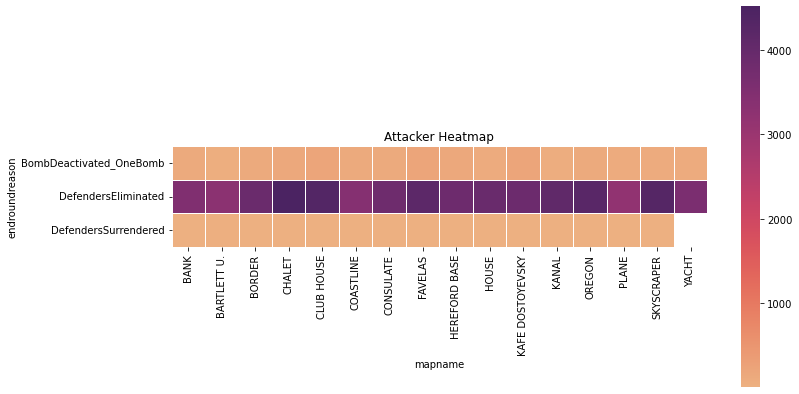

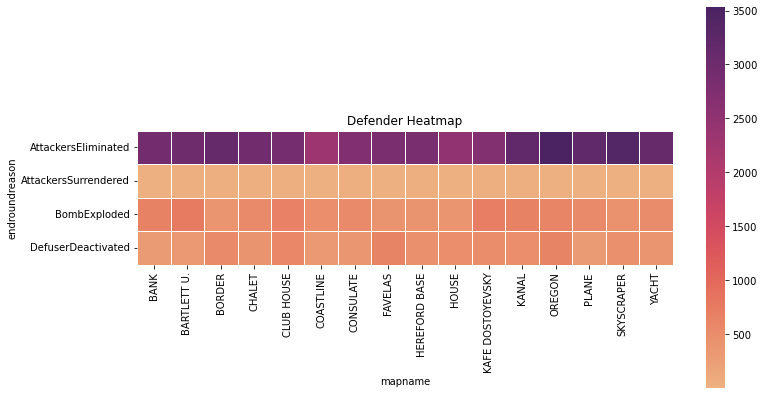

In [18]:
# Plotting the heat map
for role, tbl in ques_3_role:
    pivot = tbl.pivot(index='endroundreason', columns='mapname', values='haswon')
    f, ax = plt.subplots(figsize=(12,7))
    plt.title(role + ' Heatmap')
    sns.heatmap(pivot, cmap=cmap, square=True, linewidths=.5, ax=ax)
plt.show()

In [19]:
df_bomb_all = df_bomb.groupby(['mapname','endroundreason'], as_index = False)['haswon'].sum()
df_bomb_all

,mapname,endroundreason,haswon
0,BANK,AttackersEliminated,2936
1,BANK,AttackersSurrendered,14
2,BANK,BombDeactivated_OneBomb,121
3,BANK,BombExploded,658
4,BANK,DefendersEliminated,3511
...,...,...,...
106,YACHT,AttackersSurrendered,15
107,YACHT,BombDeactivated_OneBomb,105
108,YACHT,BombExploded,519
109,YACHT,DefendersEliminated,3597


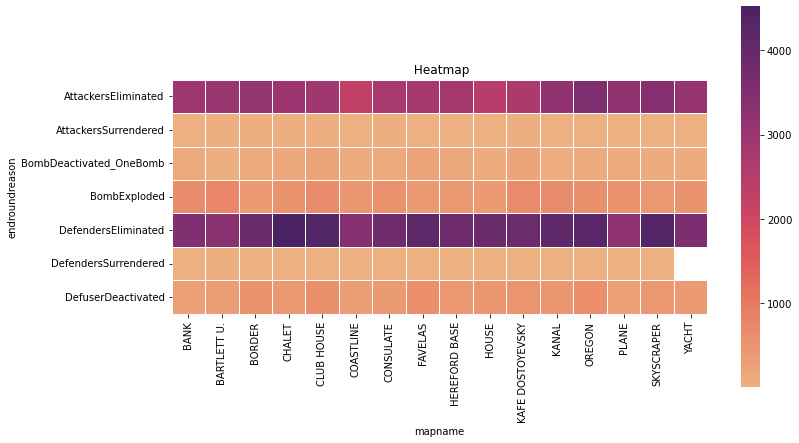

In [20]:
pivot = df_bomb_all.pivot(index='endroundreason', columns='mapname', values='haswon')
f, ax = plt.subplots(figsize=(12,7))
plt.title(' Heatmap')
sns.heatmap(pivot, cmap=cmap, square=True, linewidths=.5, ax=ax)
plt.show()

In [21]:
# Dropping attackers and defenders elimination reason

df_bomb_all.drop(df_bomb_all[df_bomb_all.endroundreason == 'AttackersEliminated'].index,inplace= True)
df_bomb_all.drop(df_bomb_all[df_bomb_all.endroundreason == 'DefendersEliminated'].index,inplace= True)
df_bomb_all.sort_values('haswon',ascending = False)

,mapname,endroundreason,haswon
10,BARTLETT U.,BombExploded,750
73,KAFE DOSTOYEVSKY,BombExploded,704
31,CLUB HOUSE,BombExploded,669
80,KANAL,BombExploded,659
3,BANK,BombExploded,658
...,...,...,...
89,OREGON,DefendersSurrendered,5
99,SKYSCRAPER,AttackersSurrendered,5
103,SKYSCRAPER,DefendersSurrendered,5
68,HOUSE,DefendersSurrendered,5


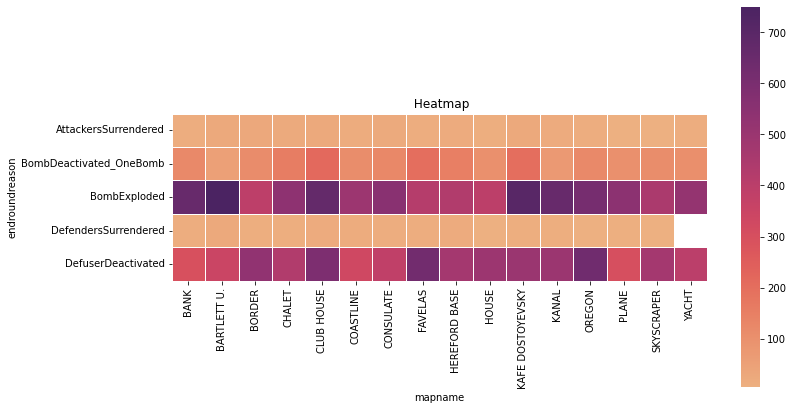

In [22]:
pivot = df_bomb_all.pivot(index='endroundreason', columns='mapname', values='haswon')
f, ax = plt.subplots(figsize=(12,7))
plt.title(' Heatmap')
sns.heatmap(pivot, cmap=cmap, square=True, linewidths=.5, ax=ax)
plt.show()

### Bank

In [43]:
df_bomb_bank = df_bomb[df_bomb['mapname'] == 'BANK'].sort_values("haswon", ascending = False)
df_bomb_bank

,mapname,winrole,endroundreason,haswon
1,BANK,Attacker,DefendersEliminated,3511
3,BANK,Defender,AttackersEliminated,2936
5,BANK,Defender,BombExploded,658
6,BANK,Defender,DefuserDeactivated,297
0,BANK,Attacker,BombDeactivated_OneBomb,121
2,BANK,Attacker,DefendersSurrendered,14
4,BANK,Defender,AttackersSurrendered,14


In [69]:
#fig = px.bar(df_bomb_bank, x = 'endroundreason', y = 'haswon', color = 'winrole', barmode = 'group')
#fig.show()

### Club House

In [17]:
df_bomb_CH = df_bomb[df_bomb['mapname'] == 'CLUB HOUSE'].sort_values("haswon", ascending = False)

In [18]:
df_bomb_CH.head()

,mapname,winrole,endroundreason,haswon
32,CLUB HOUSE,Attacker,DefendersEliminated,4350
34,CLUB HOUSE,Defender,AttackersEliminated,2905
36,CLUB HOUSE,Defender,BombExploded,669
37,CLUB HOUSE,Defender,DefuserDeactivated,591
31,CLUB HOUSE,Attacker,BombDeactivated_OneBomb,214


In [106]:
fig = px.bar(df_bomb_CH, x = 'endroundreason', y = 'haswon', color = 'winrole', barmode = 'group')
fig.show()

### PLANE

In [20]:
df_bomb_plane = df_bomb[df_bomb['mapname'] == 'PLANE'].sort_values("haswon", ascending = False)
df_bomb_plane

,mapname,winrole,endroundreason,haswon
110,PLANE,Defender,AttackersEliminated,3211
107,PLANE,Attacker,DefendersEliminated,3186
112,PLANE,Defender,BombExploded,545
113,PLANE,Defender,DefuserDeactivated,304
106,PLANE,Attacker,BombDeactivated_OneBomb,103
108,PLANE,Attacker,DefendersSurrendered,9
109,PLANE,Defender,AllTeamsDead,5
111,PLANE,Defender,AttackersSurrendered,4
114,PLANE,Defender,NoEnemies,2


In [67]:
#fig = px.bar(df_bomb_plane, x = 'endroundreason', y = 'haswon', color = 'winrole', barmode = 'group')
#fig.show()

### KANAL

In [22]:
df_bomb_kanal = df_bomb[df_bomb['mapname'] == 'KANAL'].sort_values("haswon", ascending = False)
df_bomb_kanal

,mapname,winrole,endroundreason,haswon
89,KANAL,Attacker,DefendersEliminated,4100
92,KANAL,Defender,AttackersEliminated,3173
94,KANAL,Defender,BombExploded,659
95,KANAL,Defender,DefuserDeactivated,497
88,KANAL,Attacker,BombDeactivated_OneBomb,72
93,KANAL,Defender,AttackersSurrendered,19
90,KANAL,Attacker,DefendersSurrendered,10
91,KANAL,Defender,AllTeamsDead,5
96,KANAL,Defender,NoEnemies,2


In [66]:
#fig = px.bar(df_bomb_kanal, x = 'endroundreason', y = 'haswon', color = 'winrole', barmode = 'group')
#fig.show()

# Hostage mode

In [65]:
# Filtering only the Hostage data
df_hostage = df1[df['gamemode'] == 'HOSTAGE']
df_hostage.head()

,gamemode,mapname,objectivelocation,winrole,endroundreason,role,team,haswon,nbkills,isdead
0,HOSTAGE,CLUB HOUSE,STRIP CLUB,Defender,AttackersKilledHostage,Defender,1,1,0,0
1,HOSTAGE,CLUB HOUSE,CHURCH,Defender,AttackersEliminated,Defender,0,1,0,1
2,HOSTAGE,CLUB HOUSE,CHURCH,Defender,AttackersEliminated,Defender,1,1,0,0
3,HOSTAGE,CLUB HOUSE,CHURCH,Defender,AttackersEliminated,Defender,0,1,3,0
4,HOSTAGE,CLUB HOUSE,BEDROOM,Attacker,DefendersEliminated,Defender,0,0,0,1


In [70]:
df_hostage = df_hostage.groupby(['mapname','winrole','endroundreason'], as_index = False)['haswon'].sum()

In [71]:
df_hostage.sort_values('haswon',ascending = False).head()

,mapname,winrole,endroundreason,haswon
51,CONSULATE,Defender,AttackersEliminated,1949
108,PLANE,Defender,AttackersEliminated,1871
3,BANK,Defender,AttackersEliminated,1869
12,BARTLETT U.,Defender,AttackersEliminated,1781
117,SKYSCRAPER,Defender,AttackersEliminated,1767


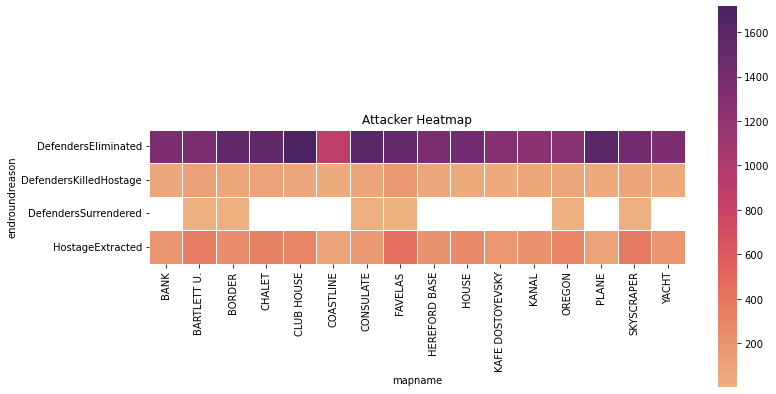

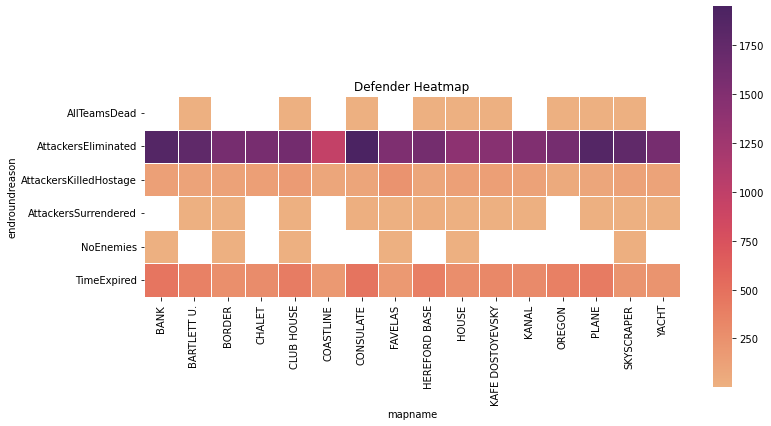

In [72]:
# Create the color
cmap = sns.color_palette("flare", as_cmap=True)
ques_3_role_hostage = df_hostage.groupby('winrole')
# plot the heat map
for role, tbl in ques_3_role_hostage:
    pivot = tbl.pivot(index='endroundreason', columns='mapname', values='haswon')
    f, ax = plt.subplots(figsize=(12,7))
    plt.title(role + ' Heatmap')
    sns.heatmap(pivot, cmap=cmap, square=True, linewidths=.5, ax=ax)
plt.show()

In [76]:
# Delete 'allteamsdead','Noenemies', attackers surrendered, Defenders surrenders

out = ['AllTeamsDead','NoEnemies','AttackersSurrendered','DefendersSurrendered']
df_hostage.drop(df_hostage[df_hostage.endroundreason == 'DefendersSurrendered'].index,inplace= True)

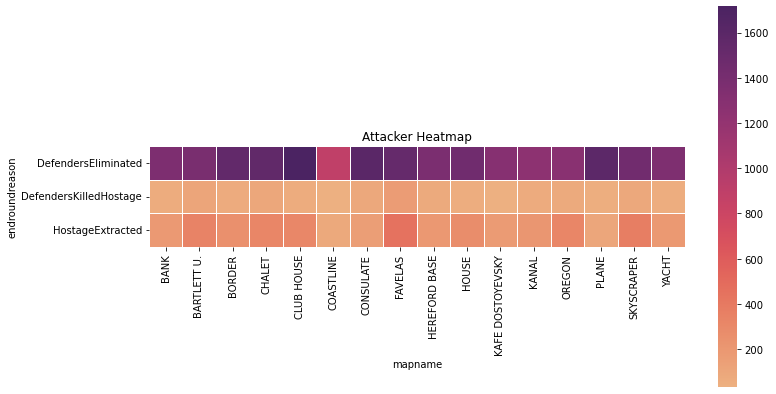

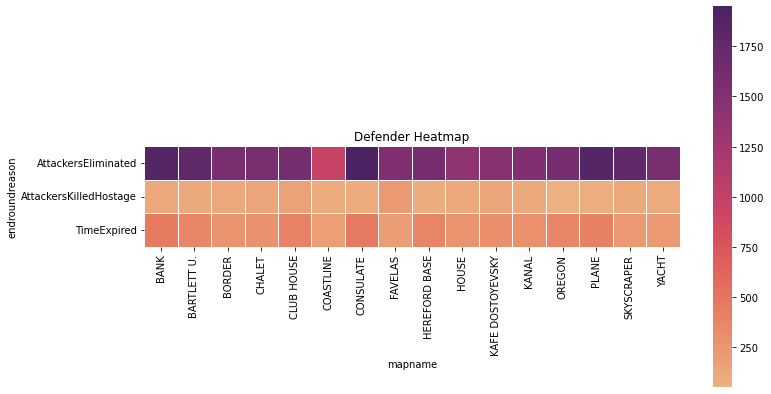

In [77]:
# Create the color
cmap = sns.color_palette("flare", as_cmap=True)
ques_3_role_hostage = df_hostage.groupby('winrole')
# plot the heat map
for role, tbl in ques_3_role_hostage:
    pivot = tbl.pivot(index='endroundreason', columns='mapname', values='haswon')
    f, ax = plt.subplots(figsize=(12,7))
    plt.title(role + ' Heatmap')
    sns.heatmap(pivot, cmap=cmap, square=True, linewidths=.5, ax=ax)
plt.show()

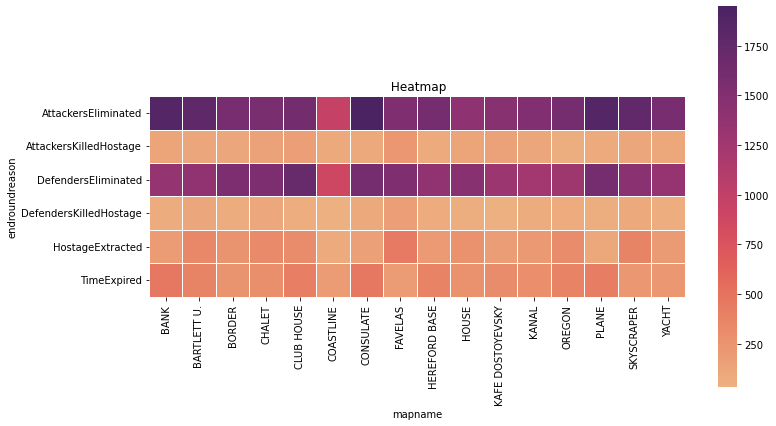

In [78]:
pivot = df_hostage.pivot(index='endroundreason', columns='mapname', values='haswon')
f, ax = plt.subplots(figsize=(12,7))
plt.title(' Heatmap')
sns.heatmap(pivot, cmap=cmap, square=True, linewidths=.5, ax=ax)
plt.show()

In [79]:
# Dropping attackers and defenders elimination reason
df_hostage_without = df_hostage
df_hostage_without.drop(df_hostage_without[df_hostage_without.endroundreason == 'AttackersEliminated'].index,inplace= True)
df_hostage_without.drop(df_hostage_without[df_hostage_without.endroundreason == 'DefendersEliminated'].index,inplace= True)
df_hostage_without.sort_values('haswon',ascending = False).head()

,mapname,winrole,endroundreason,haswon
54,CONSULATE,Defender,TimeExpired,470
6,BANK,Defender,TimeExpired,460
58,FAVELAS,Attacker,HostageExtracted,448
111,PLANE,Defender,TimeExpired,418
39,CLUB HOUSE,Defender,TimeExpired,413


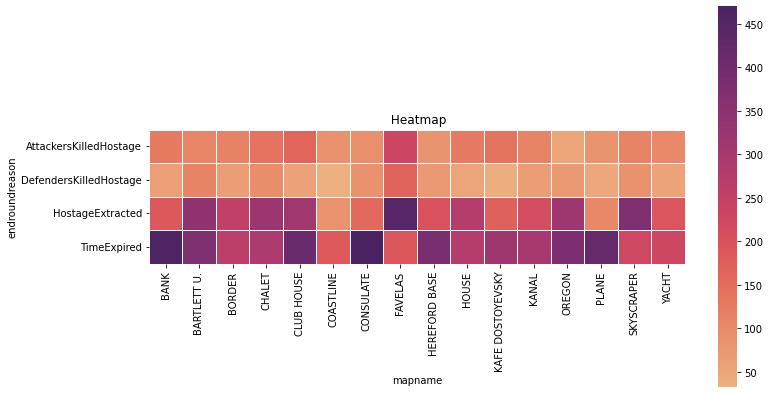

In [80]:
pivot = df_hostage_without.pivot(index='endroundreason', columns='mapname', values='haswon')
f, ax = plt.subplots(figsize=(12,7))
plt.title(' Heatmap')
sns.heatmap(pivot, cmap=cmap, square=True, linewidths=.5, ax=ax)
plt.show()

# Secure Area - Game Mode

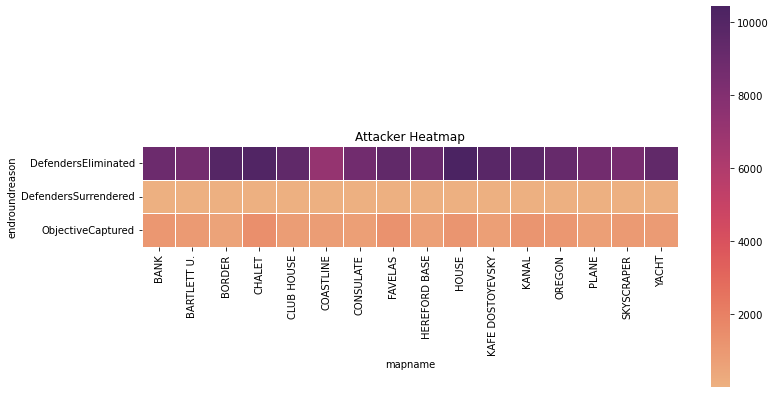

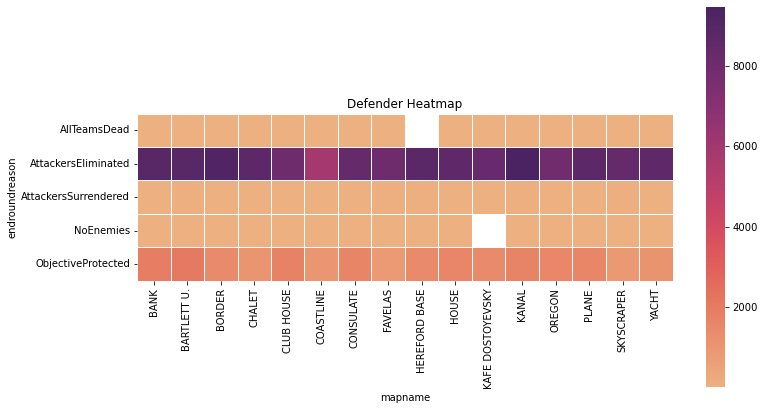

In [10]:
# Filtering only the secure area
df_secure = df1[df['gamemode'] == 'SECURE AREA']
df_secure.head()
df_secure = df_secure.groupby(['mapname','winrole','endroundreason'], as_index = False)['haswon'].sum()
df_secure.sort_values('haswon',ascending = False).head()
cmap = sns.color_palette("flare", as_cmap=True)
ques_3_role_secure = df_secure.groupby('winrole')
# plotting the heat map
for role, tbl in ques_3_role_secure:
    pivot = tbl.pivot(index='endroundreason', columns='mapname', values='haswon')
    f, ax = plt.subplots(figsize=(12,7))
    plt.title(role + ' Heatmap')
    sns.heatmap(pivot, cmap=cmap, square=True, linewidths=.5, ax=ax)
plt.show()

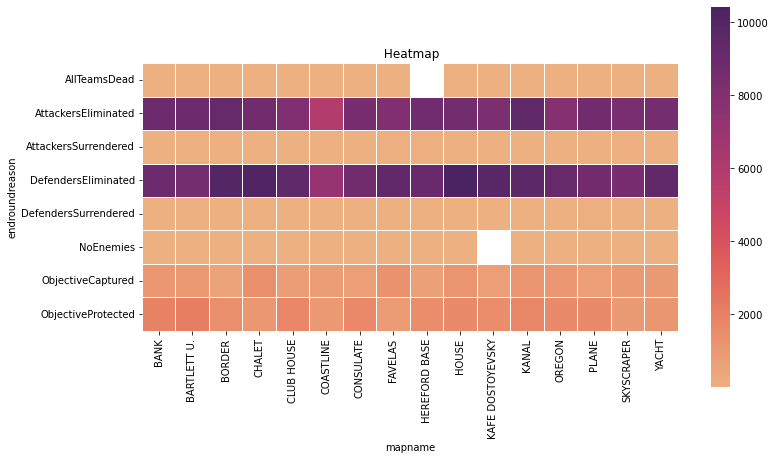

In [24]:
pivot = df_secure.pivot(index='endroundreason', columns='mapname', values='haswon')
f, ax = plt.subplots(figsize=(12,7))
plt.title(' Heatmap')
sns.heatmap(pivot, cmap=cmap, square=True, linewidths=.5, ax=ax)
plt.show()

In [11]:
# Dropping attackers and defenders elimination reason
df_secure_without = df_secure
df_secure_without.drop(df_secure_without[df_secure_without.endroundreason == 'AttackersEliminated'].index,inplace= True)
df_secure_without.drop(df_secure_without[df_secure_without.endroundreason == 'DefendersEliminated'].index,inplace= True)
df_secure_without.sort_values('haswon',ascending = False)

,mapname,winrole,endroundreason,haswon
15,BARTLETT U.,Defender,ObjectiveProtected,2103
7,BANK,Defender,ObjectiveProtected,1931
39,CLUB HOUSE,Defender,ObjectiveProtected,1751
93,KANAL,Defender,ObjectiveProtected,1701
55,CONSULATE,Defender,ObjectiveProtected,1644
...,...,...,...,...
45,COASTLINE,Defender,AttackersSurrendered,4
14,BARTLETT U.,Defender,NoEnemies,4
77,HOUSE,Defender,NoEnemies,3
30,CHALET,Defender,NoEnemies,3


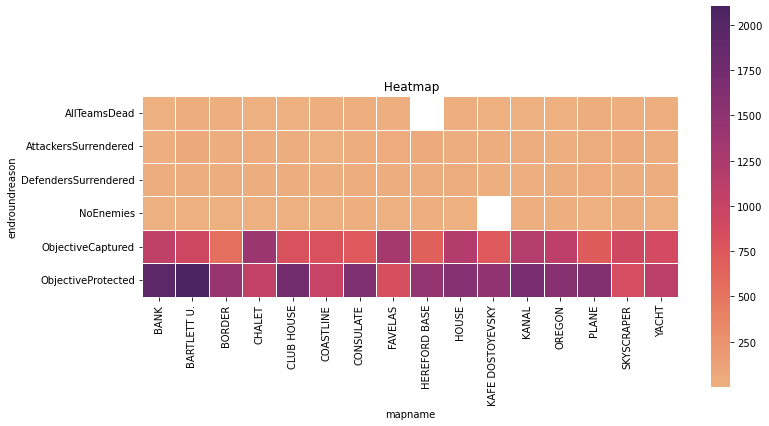

In [84]:
pivot = df_secure_without.pivot(index='endroundreason', columns='mapname', values='haswon')
f, ax = plt.subplots(figsize=(12,7))
plt.title(' Heatmap')
sns.heatmap(pivot, cmap=cmap, square=True, linewidths=.5, ax=ax)
plt.show()

In [12]:
df_secure_without_1 = df_secure_without[df_secure_without['endroundreason'].isin(["ObjectiveCaptured","ObjectiveProtected"])]

In [13]:
df_secure_without_1

,mapname,winrole,endroundreason,haswon
2,BANK,Attacker,ObjectiveCaptured,1081
7,BANK,Defender,ObjectiveProtected,1931
10,BARTLETT U.,Attacker,ObjectiveCaptured,943
15,BARTLETT U.,Defender,ObjectiveProtected,2103
18,BORDER,Attacker,ObjectiveCaptured,545
23,BORDER,Defender,ObjectiveProtected,1426
26,CHALET,Attacker,ObjectiveCaptured,1394
31,CHALET,Defender,ObjectiveProtected,1051
34,CLUB HOUSE,Attacker,ObjectiveCaptured,811
39,CLUB HOUSE,Defender,ObjectiveProtected,1751


In [16]:
df3 = df_secure_without_1.pivot_table('haswon', ['mapname'], 'endroundreason')
df3.head()

endroundreason,ObjectiveCaptured,ObjectiveProtected
mapname,,
BANK,1081,1931
BARTLETT U.,943,2103
BORDER,545,1426
CHALET,1394,1051
CLUB HOUSE,811,1751


In [18]:
df3.rename(columns = {'ObjectiveCaptured':'ObjectiveCaptured(Attacker win)', 'ObjectiveProtected':'ObjectiveProtected(Defender win)'}, inplace = True)
df3

endroundreason,ObjectiveCaptured(Attacker win),ObjectiveProtected(Defender win)
mapname,,
BANK,1081,1931
BARTLETT U.,943,2103
BORDER,545,1426
CHALET,1394,1051
CLUB HOUSE,811,1751
COASTLINE,811,1002
CONSULATE,732,1644
FAVELAS,1299,840
HEREFORD BASE,663,1469
